## Quality control and sequencing artifacts

A large fraction of the initial isoforms likely originate from technical artifacts, and thus require filtering on minimal coverage and other quality metrics. Based on quality metrics (and other properties), transcripts can get tagged e.g. to indicate potential biases.
The default definition of these tags are:
* Internal priming: 
    * Unspliced and 
    * downstream adenosine content >50%
* Reverse Transcriptase Template Switching (RTTS):
    * noncanonical spliceing with both splice sites not in reference
* Fragments
    * transcripts contained in other transcripts, with no TSS/PAS overlap from the reference annotation

We will quantify these artifacts and visualize them per replicate/ per group
This tutorial assumes you have downloaded the prepared transcriptome pkl file PacBio_isotools_substantial_isotools.pkl from the [demonstration dataset](https://oc-molgen.gnz.mpg.de/owncloud/s/gjG9EPiQwpRAyg3).

In [1]:
from isotools import Transcriptome
import matplotlib.pyplot as plt

path='demonstration_dataset'
isoseq=Transcriptome.load(f'{path}/PacBio_isotools_substantial_isotools.pkl')

In [2]:
for tag in ['INTERNAL_PRIMING','FRAGMENT','RTTS']:
    print(f'{tag}: {isoseq.filter["transcript"][tag]}')

INTERNAL_PRIMING: len(exons)==1 and downstream_A_content and downstream_A_content>.5
FRAGMENT: fragments and any("novel exonic " in a or "fragment" in a for a in annotation[1])
RTTS: noncanonical_splicing is not None and novel_splice_sites is not None and         any(2*i in novel_splice_sites and 2*i+1 in novel_splice_sites for i,_ in noncanonical_splicing)


In [3]:
#statistic on the filter flags
f_stats_groups=isoseq.filter_stats(tags=['RTTS','FRAGMENT','INTERNAL_PRIMING'], groups=isoseq.groups(), weight_by_coverage=True,min_coverage=2)
f_stats_samples=isoseq.filter_stats(tags=['RTTS','FRAGMENT','INTERNAL_PRIMING'],  weight_by_coverage=True,min_coverage=2)



<AxesSubplot:title={'center':'Expressed Transcripts > 2 reads'}, ylabel='fraction of reads'>

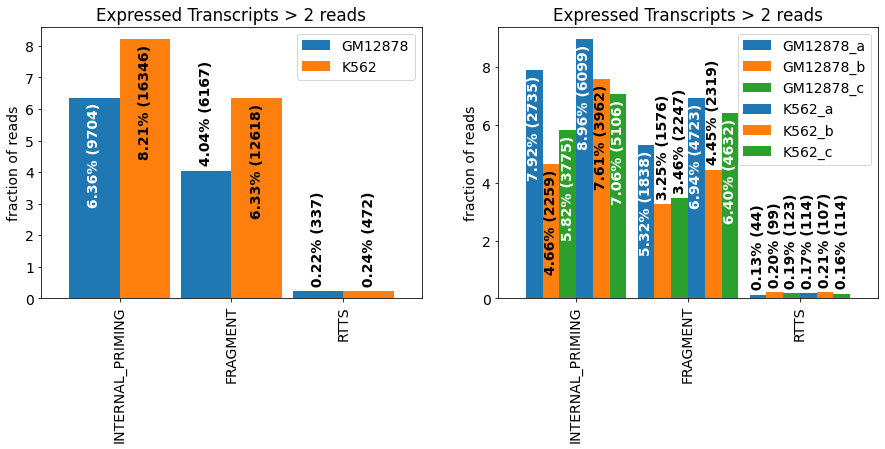

In [4]:
from isotools.plots import plot_bar

plt.rcParams["figure.figsize"] = (15,5)
plt.rcParams.update({'font.size': 14})

fig, axs = plt.subplots(1,2)

plot_bar(f_stats_groups[0],ax=axs[0],drop_categories=['PASS'],bar_width=.9,legend=True,**f_stats_groups[1])
plot_bar(f_stats_samples[0],ax=axs[1],drop_categories=['PASS'],bar_width=.9,legend=True,**f_stats_samples[1])
